In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

Keras: https://keras.io/

### Define the neural network model


Using the Keras Sequential API we define a model with three fully connected layers. 
- The first layer has an input with size of $[\texttt{batch_size}, \texttt{d0}, \texttt{d1}]$. However, in the input shape argument we only need to specify $[\texttt{d0}, \texttt{d1}]$, if the input does not have a second dimension $\texttt{d1}$ then in the input shape argument we can write $(\texttt{d0}, )$.
- The first layer also has an activation function, which we can specify using the activation argument, common choices are ReLU, sigmoid, tanh and linear. 
- By simply adding another Dense object layer to the Sequential model we can build the second layer.

<img src="https://miro.medium.com/max/1400/1*ZB6H4HuF58VcMOWbdpcRxQ.png" alt="NN_Image" width="400">

$$h_1 = g(a_1) = g(W_1^Tx + b_1)$$

$$h_2 = g(a_2) = g(W_2^Th_1 + b_2)$$

$$y = g(a_3) = g(W_3^Th_2 + b_3)$$

In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(1,)),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 24        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam', # 'rmsprop', 'sgd'
    loss='mean_squared_error', # 'mae'
    metrics='mse'
)

### Generate random data

In this example we will try to fit the curve
$$f(x) = x\cos(x) + \sin^2(x)$$

In [ ]:
X_train = tf.random.uniform(shape=[1000, ], minval=0, maxval=12)
Y_train = X_train * tf.cos(X_train) + tf.sin(X_train) ** 2 + 0.5*tf.random.normal(shape=[1000, ])

X_test = tf.random.uniform(shape=[500, ], minval=0, maxval=12)
Y_test = X_test * tf.cos(X_test) + tf.sin(X_test) ** 2 + 0.5*tf.random.normal(shape=[500, ])

In [ ]:
X_train = tf.reshape(X_train, (-1, 1))
Y_train = tf.reshape(Y_train, (-1, 1))
X_train.shape, Y_train.shape

(TensorShape([1000, 1]), TensorShape([1000, 1]))

Now we can visualize the data, note that since the data is not sorted we should use a scatter plot.

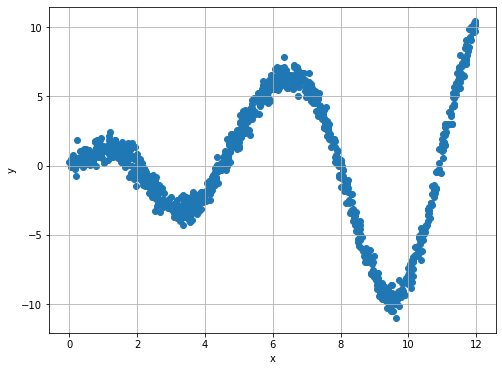

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train.numpy(), Y_train.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

### Training

Using the generated data we can train the neural network model, we train it for 500 epochs (one epoch is one pass over the entire dataset) with a batch size of 64.

In [ ]:
# training_history = model.fit(features, labels, epochs=epochs, batch_size=batch_size)
history = model.fit(X_train, Y_train, epochs=1000, validation_split=0.1, batch_size=32)

Epoch 1/1000
29/29 [==============================] - 1s 6ms/step - loss: 21.8436 - mse: 21.8436 - val_loss: 19.7343 - val_mse: 19.7343
Epoch 2/1000
29/29 [==============================] - 0s 2ms/step - loss: 21.7892 - mse: 21.7892 - val_loss: 19.6233 - val_mse: 19.6233
Epoch 3/1000
29/29 [==============================] - 0s 2ms/step - loss: 21.7948 - mse: 21.7948 - val_loss: 19.6051 - val_mse: 19.6051
Epoch 4/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.8670 - mse: 21.8670 - val_loss: 19.6083 - val_mse: 19.6083
Epoch 5/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.7860 - mse: 21.7860 - val_loss: 19.6947 - val_mse: 19.6947
Epoch 6/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.7777 - mse: 21.7777 - val_loss: 19.6501 - val_mse: 19.6501
Epoch 7/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.8178 - mse: 21.8178 - val_loss: 19.6558 - val_mse: 19.6558
Epoch 8/1000
29/29 [============================

Epoch 61/1000
29/29 [==============================] - 0s 2ms/step - loss: 21.6770 - mse: 21.6770 - val_loss: 19.5800 - val_mse: 19.5800
Epoch 62/1000
29/29 [==============================] - 0s 2ms/step - loss: 21.6938 - mse: 21.6938 - val_loss: 19.5030 - val_mse: 19.5030
Epoch 63/1000
29/29 [==============================] - 0s 2ms/step - loss: 21.7110 - mse: 21.7110 - val_loss: 19.5265 - val_mse: 19.5265
Epoch 64/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.7043 - mse: 21.7043 - val_loss: 19.4975 - val_mse: 19.4975
Epoch 65/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.7504 - mse: 21.7504 - val_loss: 19.4536 - val_mse: 19.4536
Epoch 66/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.7249 - mse: 21.7249 - val_loss: 19.4720 - val_mse: 19.4720
Epoch 67/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6765 - mse: 21.6765 - val_loss: 19.5593 - val_mse: 19.5593
Epoch 68/1000
29/29 [====================

29/29 [==============================] - 0s 1ms/step - loss: 21.7064 - mse: 21.7064 - val_loss: 19.5208 - val_mse: 19.5208
Epoch 121/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.7092 - mse: 21.7092 - val_loss: 19.5441 - val_mse: 19.5441
Epoch 122/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6770 - mse: 21.6770 - val_loss: 19.5569 - val_mse: 19.5569
Epoch 123/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6730 - mse: 21.6730 - val_loss: 19.4703 - val_mse: 19.4703
Epoch 124/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6921 - mse: 21.6921 - val_loss: 19.5392 - val_mse: 19.5392
Epoch 125/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6682 - mse: 21.6682 - val_loss: 19.5157 - val_mse: 19.5157
Epoch 126/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6667 - mse: 21.6667 - val_loss: 19.4484 - val_mse: 19.4484
Epoch 127/1000
29/29 [===========================

29/29 [==============================] - 0s 2ms/step - loss: 21.7005 - mse: 21.7005 - val_loss: 19.5442 - val_mse: 19.5442
Epoch 180/1000
29/29 [==============================] - 0s 2ms/step - loss: 21.6774 - mse: 21.6774 - val_loss: 19.4512 - val_mse: 19.4512
Epoch 181/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6775 - mse: 21.6775 - val_loss: 19.5046 - val_mse: 19.5046
Epoch 182/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6661 - mse: 21.6661 - val_loss: 19.4802 - val_mse: 19.4802
Epoch 183/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6881 - mse: 21.6881 - val_loss: 19.4786 - val_mse: 19.4786
Epoch 184/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6935 - mse: 21.6935 - val_loss: 19.5000 - val_mse: 19.5000
Epoch 185/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6778 - mse: 21.6778 - val_loss: 19.4509 - val_mse: 19.4509
Epoch 186/1000
29/29 [===========================

29/29 [==============================] - 0s 1ms/step - loss: 21.6727 - mse: 21.6727 - val_loss: 19.4743 - val_mse: 19.4743
Epoch 239/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6685 - mse: 21.6685 - val_loss: 19.4666 - val_mse: 19.4666
Epoch 240/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6677 - mse: 21.6677 - val_loss: 19.4551 - val_mse: 19.4551
Epoch 241/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6956 - mse: 21.6956 - val_loss: 19.4726 - val_mse: 19.4726
Epoch 242/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6644 - mse: 21.6644 - val_loss: 19.5242 - val_mse: 19.5242
Epoch 243/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6763 - mse: 21.6763 - val_loss: 19.4888 - val_mse: 19.4888
Epoch 244/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.7043 - mse: 21.7043 - val_loss: 19.5321 - val_mse: 19.5321
Epoch 245/1000
29/29 [===========================

29/29 [==============================] - 0s 1ms/step - loss: 21.6605 - mse: 21.6605 - val_loss: 19.5062 - val_mse: 19.5062
Epoch 298/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6640 - mse: 21.6640 - val_loss: 19.4863 - val_mse: 19.4863
Epoch 299/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6686 - mse: 21.6686 - val_loss: 19.5303 - val_mse: 19.5303
Epoch 300/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6799 - mse: 21.6799 - val_loss: 19.5861 - val_mse: 19.5861
Epoch 301/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.7255 - mse: 21.7255 - val_loss: 19.6146 - val_mse: 19.6146
Epoch 302/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6884 - mse: 21.6884 - val_loss: 19.5342 - val_mse: 19.5342
Epoch 303/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6669 - mse: 21.6669 - val_loss: 19.5058 - val_mse: 19.5058
Epoch 304/1000
29/29 [===========================

29/29 [==============================] - 0s 1ms/step - loss: 21.6531 - mse: 21.6531 - val_loss: 19.4989 - val_mse: 19.4989
Epoch 357/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6675 - mse: 21.6675 - val_loss: 19.5197 - val_mse: 19.5197
Epoch 358/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6669 - mse: 21.6669 - val_loss: 19.5178 - val_mse: 19.5178
Epoch 359/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6652 - mse: 21.6652 - val_loss: 19.4580 - val_mse: 19.4580
Epoch 360/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6557 - mse: 21.6557 - val_loss: 19.4720 - val_mse: 19.4720
Epoch 361/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6720 - mse: 21.6720 - val_loss: 19.4721 - val_mse: 19.4721
Epoch 362/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.6743 - mse: 21.6743 - val_loss: 19.5153 - val_mse: 19.5153
Epoch 363/1000
29/29 [===========================

29/29 [==============================] - 0s 1ms/step - loss: 21.5008 - mse: 21.5008 - val_loss: 19.2914 - val_mse: 19.2914
Epoch 416/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.4965 - mse: 21.4965 - val_loss: 19.2862 - val_mse: 19.2862
Epoch 417/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.4901 - mse: 21.4901 - val_loss: 19.3118 - val_mse: 19.3118
Epoch 418/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.5143 - mse: 21.5143 - val_loss: 19.3181 - val_mse: 19.3181
Epoch 419/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.4901 - mse: 21.4901 - val_loss: 19.2286 - val_mse: 19.2286
Epoch 420/1000
29/29 [==============================] - 0s 2ms/step - loss: 21.4906 - mse: 21.4906 - val_loss: 19.2313 - val_mse: 19.2313
Epoch 421/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.4770 - mse: 21.4770 - val_loss: 19.2358 - val_mse: 19.2358
Epoch 422/1000
29/29 [===========================

29/29 [==============================] - 0s 1ms/step - loss: 21.0535 - mse: 21.0535 - val_loss: 18.7063 - val_mse: 18.7063
Epoch 475/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.0698 - mse: 21.0698 - val_loss: 18.7593 - val_mse: 18.7593
Epoch 476/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.0515 - mse: 21.0515 - val_loss: 18.6744 - val_mse: 18.6744
Epoch 477/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.0579 - mse: 21.0579 - val_loss: 18.7049 - val_mse: 18.7049
Epoch 478/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.0209 - mse: 21.0209 - val_loss: 18.7235 - val_mse: 18.7235
Epoch 479/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.0183 - mse: 21.0183 - val_loss: 18.7250 - val_mse: 18.7250
Epoch 480/1000
29/29 [==============================] - 0s 1ms/step - loss: 21.0313 - mse: 21.0313 - val_loss: 18.6608 - val_mse: 18.6608
Epoch 481/1000
29/29 [===========================

29/29 [==============================] - 0s 1ms/step - loss: 20.6035 - mse: 20.6035 - val_loss: 18.0626 - val_mse: 18.0626
Epoch 534/1000
29/29 [==============================] - 0s 1ms/step - loss: 20.6230 - mse: 20.6230 - val_loss: 18.0090 - val_mse: 18.0090
Epoch 535/1000
29/29 [==============================] - 0s 1ms/step - loss: 20.5001 - mse: 20.5001 - val_loss: 18.1395 - val_mse: 18.1395
Epoch 536/1000
29/29 [==============================] - 0s 1ms/step - loss: 20.5716 - mse: 20.5716 - val_loss: 18.0636 - val_mse: 18.0636
Epoch 537/1000
29/29 [==============================] - 0s 1ms/step - loss: 20.5224 - mse: 20.5224 - val_loss: 18.0080 - val_mse: 18.0080
Epoch 538/1000
29/29 [==============================] - 0s 1ms/step - loss: 20.5309 - mse: 20.5309 - val_loss: 17.9471 - val_mse: 17.9471
Epoch 539/1000
29/29 [==============================] - 0s 1ms/step - loss: 20.5114 - mse: 20.5114 - val_loss: 17.9767 - val_mse: 17.9767
Epoch 540/1000
29/29 [===========================

29/29 [==============================] - 0s 1ms/step - loss: 19.8946 - mse: 19.8946 - val_loss: 17.1279 - val_mse: 17.1279
Epoch 593/1000
29/29 [==============================] - 0s 1ms/step - loss: 19.8048 - mse: 19.8048 - val_loss: 17.1832 - val_mse: 17.1832
Epoch 594/1000
29/29 [==============================] - 0s 1ms/step - loss: 19.8200 - mse: 19.8200 - val_loss: 17.0577 - val_mse: 17.0577
Epoch 595/1000
29/29 [==============================] - 0s 1ms/step - loss: 19.8067 - mse: 19.8067 - val_loss: 17.0223 - val_mse: 17.0223
Epoch 596/1000
29/29 [==============================] - 0s 1ms/step - loss: 19.7828 - mse: 19.7828 - val_loss: 17.0848 - val_mse: 17.0848
Epoch 597/1000
29/29 [==============================] - 0s 1ms/step - loss: 19.6839 - mse: 19.6839 - val_loss: 16.9273 - val_mse: 16.9273
Epoch 598/1000
29/29 [==============================] - 0s 1ms/step - loss: 19.6840 - mse: 19.6840 - val_loss: 16.9586 - val_mse: 16.9586
Epoch 599/1000
29/29 [===========================

29/29 [==============================] - 0s 1ms/step - loss: 17.2276 - mse: 17.2276 - val_loss: 14.2234 - val_mse: 14.2234
Epoch 652/1000
29/29 [==============================] - 0s 1ms/step - loss: 16.9171 - mse: 16.9171 - val_loss: 14.1242 - val_mse: 14.1242
Epoch 653/1000
29/29 [==============================] - 0s 1ms/step - loss: 16.8674 - mse: 16.8674 - val_loss: 14.0461 - val_mse: 14.0461
Epoch 654/1000
29/29 [==============================] - 0s 1ms/step - loss: 16.7567 - mse: 16.7567 - val_loss: 14.0496 - val_mse: 14.0496
Epoch 655/1000
29/29 [==============================] - 0s 1ms/step - loss: 16.6705 - mse: 16.6705 - val_loss: 13.9231 - val_mse: 13.9231
Epoch 656/1000
29/29 [==============================] - 0s 1ms/step - loss: 16.6919 - mse: 16.6919 - val_loss: 14.0027 - val_mse: 14.0027
Epoch 657/1000
29/29 [==============================] - 0s 1ms/step - loss: 16.5946 - mse: 16.5946 - val_loss: 13.8110 - val_mse: 13.8110
Epoch 658/1000
29/29 [===========================

29/29 [==============================] - 0s 1ms/step - loss: 12.0146 - mse: 12.0146 - val_loss: 9.6566 - val_mse: 9.6566
Epoch 711/1000
29/29 [==============================] - 0s 1ms/step - loss: 11.9321 - mse: 11.9321 - val_loss: 9.5848 - val_mse: 9.5848
Epoch 712/1000
29/29 [==============================] - 0s 1ms/step - loss: 11.8614 - mse: 11.8614 - val_loss: 9.5665 - val_mse: 9.5665
Epoch 713/1000
29/29 [==============================] - 0s 1ms/step - loss: 11.8595 - mse: 11.8595 - val_loss: 9.4558 - val_mse: 9.4558
Epoch 714/1000
29/29 [==============================] - 0s 1ms/step - loss: 11.6648 - mse: 11.6648 - val_loss: 9.4063 - val_mse: 9.4063
Epoch 715/1000
29/29 [==============================] - 0s 1ms/step - loss: 11.4940 - mse: 11.4940 - val_loss: 9.7336 - val_mse: 9.7336
Epoch 716/1000
29/29 [==============================] - 0s 1ms/step - loss: 11.6767 - mse: 11.6767 - val_loss: 9.1898 - val_mse: 9.1898
Epoch 717/1000
29/29 [==============================] - 0s 1ms/

Epoch 771/1000
29/29 [==============================] - 0s 1ms/step - loss: 6.5780 - mse: 6.5780 - val_loss: 5.6029 - val_mse: 5.6029
Epoch 772/1000
29/29 [==============================] - 0s 1ms/step - loss: 6.6874 - mse: 6.6874 - val_loss: 5.2984 - val_mse: 5.2984
Epoch 773/1000
29/29 [==============================] - 0s 1ms/step - loss: 6.3005 - mse: 6.3005 - val_loss: 5.2373 - val_mse: 5.2373
Epoch 774/1000
29/29 [==============================] - 0s 1ms/step - loss: 6.2326 - mse: 6.2326 - val_loss: 5.1967 - val_mse: 5.1967
Epoch 775/1000
29/29 [==============================] - 0s 1ms/step - loss: 6.1866 - mse: 6.1866 - val_loss: 5.2104 - val_mse: 5.2104
Epoch 776/1000
29/29 [==============================] - 0s 1ms/step - loss: 6.3343 - mse: 6.3343 - val_loss: 5.4423 - val_mse: 5.4423
Epoch 777/1000
29/29 [==============================] - 0s 1ms/step - loss: 6.3820 - mse: 6.3820 - val_loss: 5.1095 - val_mse: 5.1095
Epoch 778/1000
29/29 [==============================] - 0s 1ms

29/29 [==============================] - 0s 1ms/step - loss: 2.8789 - mse: 2.8789 - val_loss: 2.5996 - val_mse: 2.5996
Epoch 833/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.7716 - mse: 2.7716 - val_loss: 2.7095 - val_mse: 2.7095
Epoch 834/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.9271 - mse: 2.9271 - val_loss: 2.6322 - val_mse: 2.6322
Epoch 835/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.8113 - mse: 2.8113 - val_loss: 2.5438 - val_mse: 2.5438
Epoch 836/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.6349 - mse: 2.6349 - val_loss: 2.4741 - val_mse: 2.4741
Epoch 837/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.6130 - mse: 2.6130 - val_loss: 2.4898 - val_mse: 2.4898
Epoch 838/1000
29/29 [==============================] - 0s 1ms/step - loss: 2.5748 - mse: 2.5748 - val_loss: 2.4582 - val_mse: 2.4582
Epoch 839/1000
29/29 [==============================] - 0s 1ms/step - loss: 2

29/29 [==============================] - 0s 1ms/step - loss: 1.1536 - mse: 1.1536 - val_loss: 1.5592 - val_mse: 1.5592
Epoch 894/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.1912 - mse: 1.1912 - val_loss: 1.2934 - val_mse: 1.2934
Epoch 895/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.1207 - mse: 1.1207 - val_loss: 1.4683 - val_mse: 1.4683
Epoch 896/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.1336 - mse: 1.1336 - val_loss: 1.2155 - val_mse: 1.2155
Epoch 897/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.2131 - mse: 1.2131 - val_loss: 1.1352 - val_mse: 1.1352
Epoch 898/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.0915 - mse: 1.0915 - val_loss: 1.1290 - val_mse: 1.1290
Epoch 899/1000
29/29 [==============================] - 0s 1ms/step - loss: 1.1125 - mse: 1.1125 - val_loss: 1.2306 - val_mse: 1.2306
Epoch 900/1000
29/29 [==============================] - 0s 1ms/step - loss: 1

29/29 [==============================] - 0s 1ms/step - loss: 0.6806 - mse: 0.6806 - val_loss: 0.6714 - val_mse: 0.6714
Epoch 955/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.6101 - mse: 0.6101 - val_loss: 0.6813 - val_mse: 0.6813
Epoch 956/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.6187 - mse: 0.6187 - val_loss: 0.6128 - val_mse: 0.6128
Epoch 957/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.6135 - mse: 0.6135 - val_loss: 0.8032 - val_mse: 0.8032
Epoch 958/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.6242 - mse: 0.6242 - val_loss: 0.5877 - val_mse: 0.5877
Epoch 959/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.6011 - mse: 0.6011 - val_loss: 0.6069 - val_mse: 0.6069
Epoch 960/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.6165 - mse: 0.6165 - val_loss: 0.6021 - val_mse: 0.6021
Epoch 961/1000
29/29 [==============================] - 0s 1ms/step - loss: 0

In [ ]:
print(len(history.history['loss']))

1000


### Evaluate the performance of the model

Using the `model.predict()` method we can evaluate the performance of our model on the testing dataset and compare it with the corresponding ground truth data.

In [ ]:
# prediction = model.predict(features)
y_hat = model.predict(X_test)

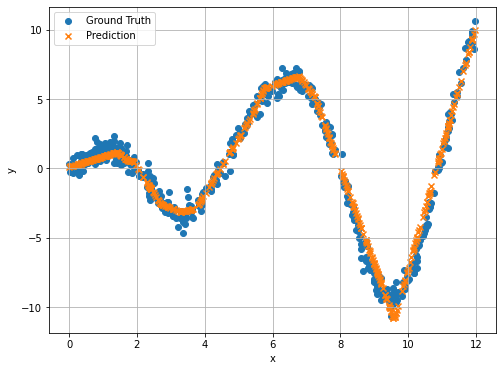

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_test.numpy(), Y_test.numpy(), label='Ground Truth')
plt.scatter(X_test.numpy(), y_hat, marker='x', label='Prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [ ]:
loss_history = history.history['loss']

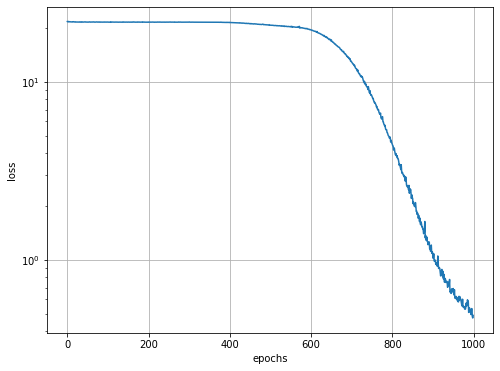

In [ ]:
plt.figure(figsize=(8,6))
plt.semilogy(loss_history)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

### Summary

We can see that using Keras' Sequential API we can build a functional neural network using very few lines of code.
```
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics='mse'
)

history = model.fit(X_train, Y_train, epochs=500, batch_size=32)
```